** Naive Bayes Algorithm **

In [1]:
%matplotlib inline
%run 'TrainingData.ipynb'
%run 'DisplayHelpers.ipynb'

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold
from scipy.sparse import lil_matrix

myappdata = TrainingData()

N Fold Precision = 0.666817674019 Recall 0.621786738222
N Fold Precision = 0.654950454102 Recall 0.619773132715
N Fold Precision = 0.657671668044 Recall 0.615687325377
N Fold Precision = 0.648992677524 Recall 0.614289658866
N Fold Precision = 0.656342924533 Recall 0.61533426459
N Fold Precision = 0.663832997607 Recall 0.622335495281
N Fold Precision = 0.661597499319 Recall 0.619238745684
N Fold Precision = 0.676887066739 Recall 0.627316645201
N Fold Precision = 0.642087876621 Recall 0.617185575855
N Fold Precision = 0.657234004046 Recall 0.630138047555
Overall Precision = 0.658641484255 Recall 0.620308562935


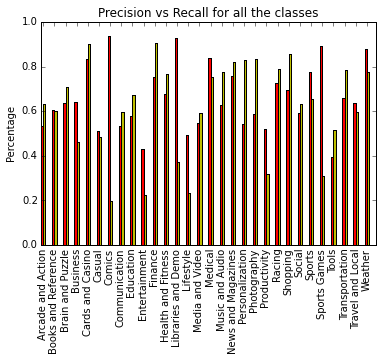

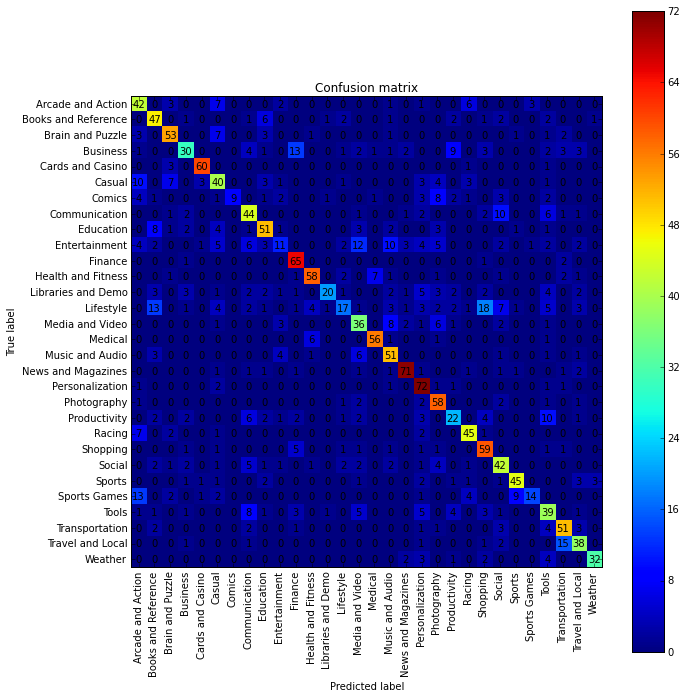

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.naive_bayes import MultinomialNB

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = MultinomialNB()
    predict_labels_arr = clf.fit(train_data, train_labels).predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
print("Overall Precision = {0} Recall {1}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall)))
plot_precision_and_recall(average_precision, average_recall, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)
